**Evil Geniuses x Genius League Data Analyst Assessment**\
**Yuang Gao**

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('social_data.xlsx')

In [3]:
df.head()

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0,0,Text
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0,0,Text
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0,0,Text
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0,0,Text
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video


Data Summary:
       Total Impressions  Total Engagements
count        3479.000000        3479.000000
mean        10972.453579         947.390629
std         29577.108063        3468.628038
min             0.000000           0.000000
25%           167.000000           0.000000
50%          1884.000000          39.000000
75%         12467.000000         276.500000
max        753227.000000       95062.000000

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Published Date     3479 non-null   datetime64[ns]
 1   Account            3479 non-null   object        
 2   Account Type       3479 non-null   object        
 3   Campaign Name      3479 non-null   object        
 4   Total Impressions  3479 non-null   int64         
 5   Total Engagements  3479 non-null   int64         
 6   Media Type         3

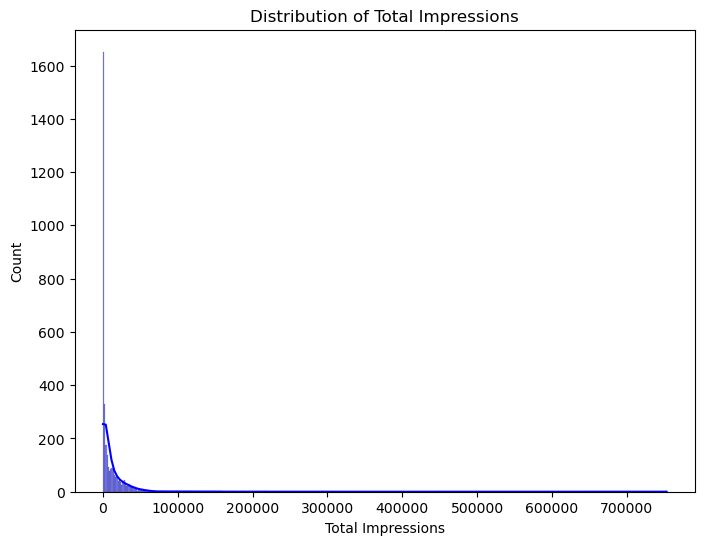

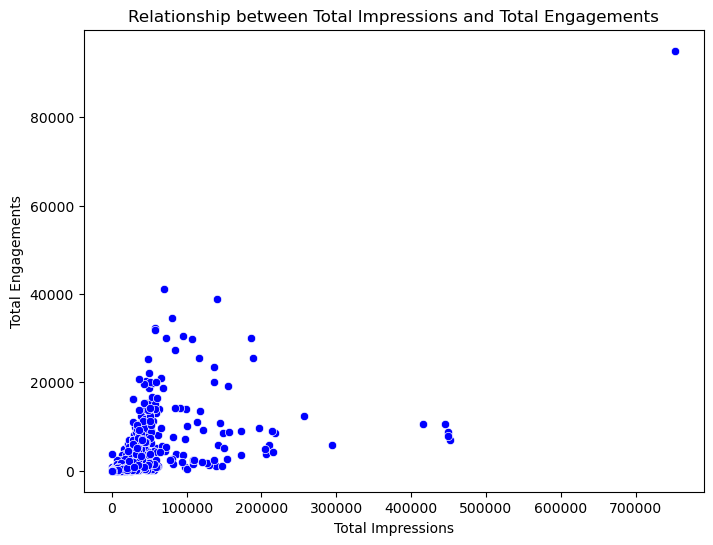

In [4]:
# Perform exploratory data analysis (EDA)
print("Data Summary:")
print(df.describe())  # Statistical summary of the data

print("\nData Information:")
print(df.info())  # Information about the data types and missing values

# Plot the distribution of 'Total Impressions'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Total Impressions', kde=True, color='blue')
plt.xlabel('Total Impressions')
plt.ylabel('Count')
plt.title('Distribution of Total Impressions')

# Plot the relationship between 'Total Impressions' and 'Total Engagements'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Total Impressions', y='Total Engagements', color='blue')
plt.xlabel('Total Impressions')
plt.ylabel('Total Engagements')
plt.title('Relationship between Total Impressions and Total Engagements')

# Display the plots
plt.show()

**1. What is the typical engagement rate we can expect? What’s the likelihood that we can achieve a 15% engagement rate?**

In [5]:
# Calculate the engagement rate
df['Engagement Rate'] = (df['Total Engagements'] / df['Total Impressions']) * 100

df = df[df['Engagement Rate'] <= 100]

# Calculate the typical engagement rate
typical_engagement_rate = df['Engagement Rate'].mean()
print("Typical engagement rate: {:.2f}%".format(typical_engagement_rate))

# Calculate the likelihood of achieving a 15% engagement rate
likelihood_15_percent = len(df[df['Engagement Rate'] >= 15]) / len(df) * 100
print("Likelihood of achieving a 15% engagement rate: {:.2f}%".format(likelihood_15_percent))

Typical engagement rate: 5.35%
Likelihood of achieving a 15% engagement rate: 8.16%


**2. Does day of the week and time of posting affect engagement rates?**

In [6]:
# Extract the day of the week and hour of the day from the 'Published Date'
df['Day of Week'] = df['Published Date'].dt.dayofweek
df['Hour of Day'] = df['Published Date'].dt.hour

In [7]:
# Group the data by day of the week and hour of the day and calculate the average engagement rate
dow_data = df.groupby(['Day of Week']).agg({'Engagement Rate': 'mean'})
dow_data

,Engagement Rate
Day of Week,
0,4.517345
1,6.535451
2,4.453678
3,6.103462
4,5.087298
5,3.779530
6,5.897657


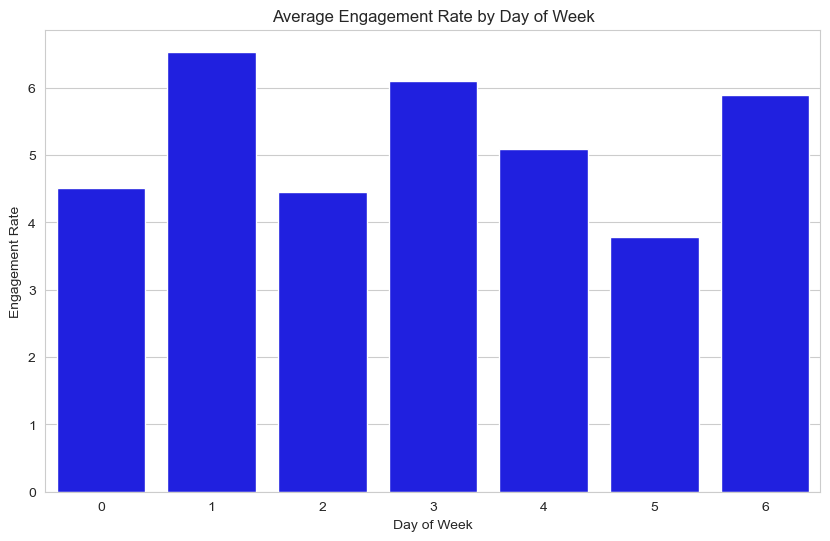

In [8]:
# Set the style of the plot
sns.set_style("whitegrid")

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x= dow_data.index, y= dow_data['Engagement Rate'], color='blue')

# Add labels and title
plt.xlabel('Day of Week')
plt.ylabel('Engagement Rate')
plt.title('Average Engagement Rate by Day of Week')

# Display the plot
plt.show()

In [9]:
# Group the data by day of the week and hour of the day and calculate the average engagement rate
hod_data = df.groupby(['Hour of Day']).agg({'Engagement Rate': 'mean'})
hod_data

,Engagement Rate
Hour of Day,
2,0.840156
3,5.656221
4,5.575346
5,11.488999
6,7.962271
7,6.656849
8,7.409689
9,6.166991
10,4.763516


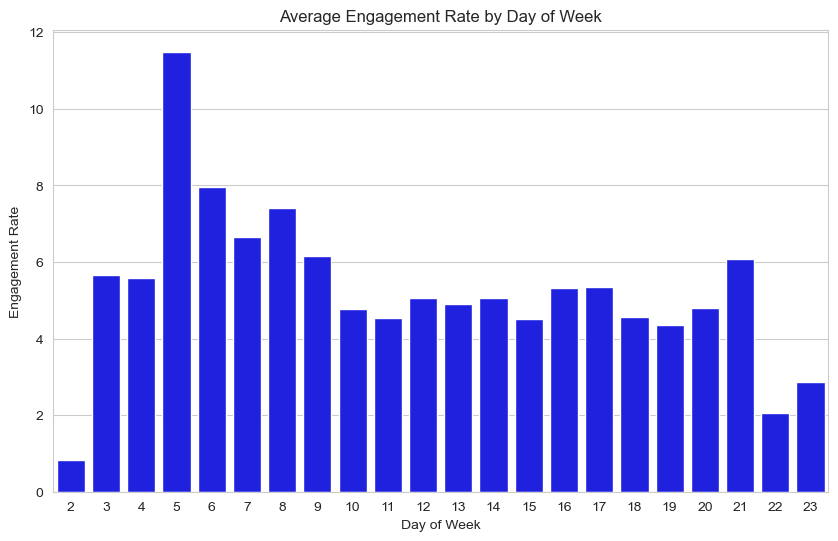

In [10]:
# Set the style of the plot
sns.set_style("whitegrid")

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x= hod_data.index, y= hod_data['Engagement Rate'], color='blue')

# Add labels and title
plt.xlabel('Day of Week')
plt.ylabel('Engagement Rate')
plt.title('Average Engagement Rate by Day of Week')

# Display the plot
plt.show()

Based on the data, it appears that both the day of the week and the hour of the day have an impact on the average engagement rates.

**Day of the week:**

- Monday (1) and Wednesday (3) have higher average engagement rates compared to other days, with rates of 6.54% and 6.10% respectively.
- Saturday (5) has the lowest average engagement rate at 3.78%.

**Hour of the day:**

- Hours 5 and 6 AM have the highest average engagement rates, with rates of 11.49% and 7.96% respectively.
- Hours 2 AM and 22-23 PM have the lowest average engagement rates, with rates around 2-3%.

The data suggests that both the day of the week and the time of posting have an impact on engagement rates. To optimize engagement, it is advisable to take these factors into account when scheduling posts. Specifically, focusing on Mondays and Wednesdays, as well as posting during the early morning hours, may lead to higher engagement levels. However, it's important to acknowledge that these findings are based on the available data and may vary depending on the unique characteristics of the target audience and the specific context. It is essential to consistently monitor and analyze engagement patterns to continually refine the posting strategy and maximize results


**3. How are our game titles doing in terms of social performance? Is there a specific game we should focus more on or less?**

In [11]:
# clean the data by removing space 
df['Account'] = df['Account'].replace('General ', 'General')

# Group the data by game title and calculate the average engagement rate for each title
title_data= df.groupby('Account').agg({'Engagement Rate': lambda rate: rate.mean(),
                                        'Account': 'size',
                                        'Total Impressions': lambda x: x.mean(),
                                        'Total Engagements': lambda x: x.mean()})

title_data.columns=['Average Engagement Rate','Number of Post','Average Impressions','Average Engagements']

# Sort the game titles based on average engagement rate
title_sorted_data = title_data.sort_values('Average Engagement Rate', ascending=False)

title_sorted_data

,Average Engagement Rate,Number of Post,Average Impressions,Average Engagements
Account,,,,
Content Creators,6.171672,35,1291.028571,39.628571
General,5.626132,1767,19202.858517,1738.861347
Valorant,5.337990,34,675.852941,27.382353
DOTA2,4.944886,698,2663.790831,177.636103
CSGO,4.132564,198,11686.454545,466.343434


Based on these metrics, we can observe the following trends:

- The **Content Creators** category has the highest average engagement rate (6.17%) among the game titles. It also has a relatively low number of posts and average impressions, suggesting the potential for growth by increasing content output and reaching a larger audience.

- The **General** category has a solid average engagement rate (5.63%) and a significant number of posts and average impressions. This indicates a strong overall social performance. Maintaining focus on this category is crucial to sustaining and further improving engagement levels.

- **Valorant** shows a competitive average engagement rate (5.34%), but the number of posts and average impressions is relatively low. Increasing the number of posts and expanding reach could lead to higher engagement and increased visibility for this game title.

- **DOTA2** and **CSGO** both exhibit lower average engagement rates compared to the other game titles. While DOTA2 has a higher number of posts and average impressions compared to CSGO, the engagement levels for both can be improved. It might be worth exploring strategies to enhance engagement and reach for these game titles.

In conclusion, the **Content Creators** category and **Valorant** game title have potential for growth and should receive more attention to increase their social performance. The **General** category should continue to be a focus due to its strong overall performance. **DOTA2** and **CSGO** may benefit from refining their social strategies to improve engagement rates and increase reach.


**4. What media type performs the best?**

In [12]:
# Group the data by media type and calculate the average engagement rate for each type
media_data= df.groupby('Media Type').agg({'Engagement Rate': lambda rate: rate.mean(),
                                        'Media Type': 'size',
                                        'Total Impressions': lambda x: x.mean(),
                                        'Total Engagements': lambda x: x.mean()})

media_data.columns=['Average Engagement Rate','Number of Post','Average Impressions','Average Engagements']

# Sort the media type based on average engagement rate
media_sorted_data = media_data.sort_values('Average Engagement Rate', ascending=False)

media_sorted_data

,Average Engagement Rate,Number of Post,Average Impressions,Average Engagements
Media Type,,,,
Album,40.000000,1,20.000000,8.000000
Mixed,10.770357,5,36996.800000,2732.800000
Photo,5.915730,1242,19238.072464,1741.528986
Video,5.351780,886,11958.028217,970.034989
Text,4.083904,548,5668.253650,449.474453
Carousel,3.784294,9,17854.333333,726.777778
Link,3.749983,41,5669.878049,55.048780


Based on these metrics, we can observe the following trends:
- The **Album** media type has the highest average engagement rate (40.00%), but it is based on only one post, so the sample size is small.

- **Mixed** media type has the second-highest average engagement rate (10.77%), with a relatively high number of posts and average impressions.

- **Photo** and **Video** media types have similar average engagement rates (around 5.92% and 5.35%, respectively) and significant numbers of posts and average engagements.

- **Text**, **Carousel**, and **Link** media types have relatively lower average engagement rates (ranging from 4.08% to 3.75%), with varying numbers of posts and average impressions.

Based on these findings, the **Album** media type has the highest average engagement rate. However, it's important to note that this conclusion is based on a very small sample size of one post, which may not be representative. Therefore, a more reliable assessment of the best performing media type can be made by considering media types with larger sample sizes, such as **Mixed**, **Photo**, and **Video**, which have relatively high average engagement rates, along with a considerable number of posts and engagements.

**5. What is our best performing campaign?**

In [13]:
# Group the data by campaign name and calculate the average engagement rate for each campaign
campaign_data= df[df['Campaign Name']!= 'N/A '].groupby('Campaign Name').agg({'Engagement Rate': lambda rate: rate.mean(),
                                        'Campaign Name': 'size',
                                        'Total Impressions': lambda x: x.mean(),
                                        'Total Engagements': lambda x: x.mean()})

campaign_data.columns=['Average Engagement Rate','Number of Post','Average Impressions','Average Engagements']

# Sort the campaigns based on average engagement rate
campaign_sorted_data = campaign_data.sort_values('Average Engagement Rate', ascending=False)

campaign_sorted_data

,Average Engagement Rate,Number of Post,Average Impressions,Average Engagements
Campaign Name,,,,
Community Engagement,5.765298,1379,17261.606962,1482.789703
Evergreen,3.510548,161,8252.975155,267.869565
Evil Exhibited,2.866060,393,14612.201018,471.513995


Based on these metrics, we can make the following observations:

- **Community Engagement** is the best performing campaign with the highest average engagement rate (5.77%) and a significant number of posts and average engagements.
- **Evergreen campaign** has a lower average engagement rate (3.51%) compared to Community Engagement, but it still has a reasonable number of posts and engagements.
- **Evil Exhibited** has the lowest average engagement rate (2.87%) among the analyzed campaigns, along with a lower number of posts and average engagements.

Based on these findings, the **Community Engagement** campaign is the best performing campaign in terms of average engagement rate. It consistently achieves a higher engagement rate compared to the other campaigns, indicating better social performance and audience engagement.

**6. Define out a posting strategy for our social channels based on your discoveries.**

In [14]:
# Group the data by campaign name and calculate the average engagement rate for each campaign
channel_data= df.groupby('Account Type').agg({'Engagement Rate': lambda rate: rate.mean(),
                                        'Account Type': 'size',
                                        'Total Impressions': lambda x: x.mean(),
                                        'Total Engagements': lambda x: x.mean()})

channel_data.columns=['Average Engagement Rate','Number of Post','Average Impressions','Average Engagements']

# Sort the campaigns based on average engagement rate
channel_sorted_data = channel_data.sort_values('Average Engagement Rate', ascending=False)

channel_sorted_data

,Average Engagement Rate,Number of Post,Average Impressions,Average Engagements
Account Type,,,,
FBPAGE,15.271555,430,33657.772093,5982.613953
TIKTOK_BUSINESS,5.364224,112,3072.848214,168.437500
YOUTUBE,4.471692,150,1589.353333,68.853333
TWITTER,3.830083,1655,11782.837462,365.292447
LINKEDIN_COMPANY,1.795018,22,1945.500000,38.590909
INSTAGRAM,1.080055,363,9845.892562,231.644628


In [15]:
channel_data= df.groupby(['Account Type', 'Media Type']).agg({'Engagement Rate': lambda rate: rate.mean(),
                                        'Account Type': 'size',
                                        'Total Impressions': lambda x: x.mean(),
                                        'Total Engagements': lambda x: x.mean()})

channel_data.columns=['Average Engagement Rate','Number of Post','Average Impressions','Average Engagements']

# Sort the campaigns based on average engagement rate
channel_sorted_data = channel_data.sort_values(['Account Type', 'Average Engagement Rate'], ascending=[True, False])


channel_sorted_data

Average Engagement Rate  Number of Post  \
Account Type     Media Type                                            
FBPAGE           Album                     40.000000               1   
                 Text                      16.324993              32   
                 Photo                     15.188455             310   
                 Video                     15.059735              86   
                 Link                       0.810474               1   
INSTAGRAM        Carousel                   3.784294               9   
                 Video                      1.153289             198   
                 Photo                      0.831089             156   
LINKEDIN_COMPANY Video                      2.479645               2   
                 Link                       2.310642               3   
                 Photo                      1.934351              13   
                 Text                       0.613156               4   
TIKTOK_BUSINESS  Video                      5.364224             112   
TWITTER          Mixed                     10.770357               5   
                 Video                      5.744623             338   
                 Link                       3.946132              37   
                 Text                       3.345951             512   
                 Photo                      3.255727             763   
YOUTUBE          Video                      4.471692             150   

                             Average Impressions  Average Engagements  
Account Type     Media Type                                            
FBPAGE           Album                 20.000000             8.000000  
                 Text               37621.843750          6342.781250  
                 Photo              31821.354839          5831.961290  
                 Video              39510.313953          6530.081395  
                 Link                6416.000000            52.000000  
INSTAGRAM        Carousel           17854.333333           726.777778  
                 Video              10469.767677           195.676768  
                 Photo               8592.025641           248.730769  
LINKEDIN_COMPANY Video               1457.000000            35.500000  
                 Link                2584.000000            64.666667  
                 Photo               1960.923077            41.538462  
                 Text                1660.750000            11.000000  
TIKTOK_BUSINESS  Video               3072.848214           168.437500  
TWITTER          Mixed              36996.800000          2732.800000  
                 Video              13427.325444           680.047337  
                 Link                5899.918919            54.351351  
                 Text                3702.462891            84.568359  
                 Photo              16596.615990           413.799476  
YOUTUBE          Video               1589.353333            68.853333

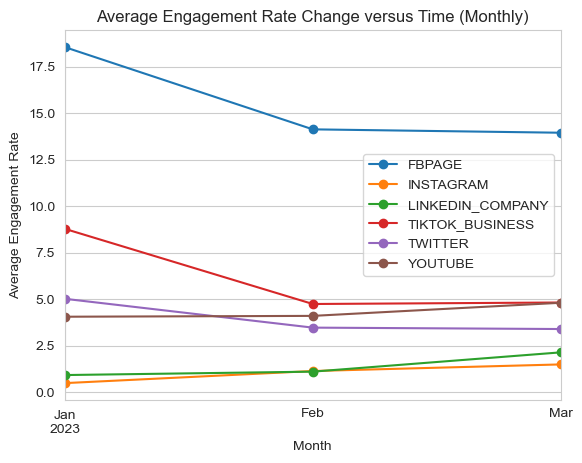

In [16]:
# Extract the month from the 'Published Date' column
df['Month'] = df['Published Date'].dt.to_period('M')

# Group the data by 'Month' and 'Account Type' and calculate the average engagement rate
average_engagement = df.groupby(['Month', 'Account Type'])['Engagement Rate'].mean().reset_index()

# Pivot the data to have 'Account Type' as columns and 'Month' as index
pivot_data = average_engagement.pivot(index='Month', columns='Account Type', values='Engagement Rate')

# Plot the line chart
pivot_data.plot(marker='o')

# Set the chart title and labels
plt.title('Average Engagement Rate Change versus Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Average Engagement Rate')

# Show the legend
plt.legend()

# Display the chart
plt.show()

**Posting Strategy Recommendations:**

1. **FBPAGE:**

FBPAGE has the highest average engagement rate (15.27%) among the analyzed social channels. It also has a significant number of posts and high average impressions and engagements. Therefore, focusing more on FBPAGE and increasing the frequency of posts can help maximize engagement and reach a larger audience.

**Posting Strategy Recommendation:**
- Focus on posting engaging albums, text-based posts, photos, and videos.
- Capitalize on the high average engagement rate for albums and prioritize creating more of them.
- Leverage the high average impressions and engagements for text-based posts, photos, and videos to drive more interactions and reach.
- Maintain a consistent posting schedule to keep the audience engaged.

2. **LINKEDIN_COMPANY and INSTAGRAM:**

LINKEDIN_COMPANY and INSTAGRAM have lower average engagement rates (1.80% and 1.08%, respectively) and moderate numbers of posts. To enhance the performance on these platforms, it would be beneficial to analyze the content strategy, ensure it aligns with the target audience, and experiment with different types of posts (such as engaging visuals, informative articles, or industry-related updates) to increase engagement and reach.

**Posting Strategy Recommendation for Instagram:**
- Utilize carousels, videos, and photos as they show engagement potential.
- Experiment with different content formats and styles to keep the feed visually appealing and diverse.
- Engage with the Instagram community through comments, likes, and collaborations.
- Use relevant hashtags and geotags to increase discoverability.

**Posting Strategy Recommendation for LinkedIn:**
- Prioritize video and link posts to take advantage of the higher average engagement rates.
- Share industry insights, thought leadership articles, and company updates.
- Engage with professionals by participating in relevant groups and discussions.
- Optimize the LinkedIn company page by adding detailed information and visuals.

3. **TWITTER:**

TWITTER has a moderate average engagement rate (3.83%) and a large number of posts. However, the average impressions and engagements are relatively lower compared to FBPAGE. To improve the performance on TWITTER, it would be advisable to focus on creating highly engaging content and optimizing the posting frequency and timing to reach a wider audience.

**Posting Strategy Recommendation for Twitter:**
- Leverage the high average engagement rate for mixed content, videos, and links.
- Post a mix of engaging text-based tweets, videos, images, and links.
- Use relevant hashtags to increase discoverability and join trending conversations.
- Retweet and engage with followers and industry influencers to foster community engagement.

4. **TIKTOK_BUSINESS and YOUTUBE:**

TIKTOK_BUSINESS and YOUTUBE have relatively lower average engagement rates compared to FBPAGE but still show reasonable engagement levels. Considering the popularity of video content on these platforms, it would be beneficial to continue posting engaging videos and explore ways to increase the number of posts to enhance visibility and engagement.

**Posting Strategy Recommendation for TikTok Business:**
- Continue focusing on video content as it has a relatively high average engagement rate.
- Create short and catchy videos that align with your brand and target audience.
- Stay updated with the latest TikTok trends and challenges to participate and increase visibility.
- Collaborate with TikTok influencers to amplify reach and engagement.

**Posting Strategy Recommendation for YouTube:**
- Concentrate on video content as it demonstrates a decent average engagement rate.
- Create high-quality and informative videos that resonate with your target audience.
- Optimize video titles, descriptions, and tags to improve searchability.
- Encourage viewers to like, comment, and subscribe to your channel.

**7. What suggestions would you give to the social media team if they want to expand their presence (e.g. if our CSGO youtube channel is doing well should we expand to TikTok)?**

In [17]:
# Group the data by game title and calculate the average engagement rate for each title
title_data= df.groupby(['Account', 'Account Type']).agg({'Engagement Rate': lambda rate: rate.mean(),
                                        'Account': 'size',
                                        'Total Impressions': lambda x: x.mean(),
                                        'Total Engagements': lambda x: x.mean()})

title_data.columns=['Average Engagement Rate','Number of Post','Average Impressions','Average Engagements']

# Sort the game titles based on average engagement rate
title_sorted_data = title_data.sort_values(['Account', 'Average Engagement Rate'], ascending=[True, False])

title_sorted_data

Average Engagement Rate  Number of Post  \
Account          Account Type                                                
CSGO             TWITTER                          4.132564             198   
Content Creators YOUTUBE                          6.171672              35   
DOTA2            YOUTUBE                          5.011636               5   
                 TWITTER                          4.944404             693   
General          FBPAGE                          15.271555             430   
                 TIKTOK_BUSINESS                  5.364224             112   
                 YOUTUBE                          3.265729              76   
                 TWITTER                          2.740927             764   
                 LINKEDIN_COMPANY                 1.795018              22   
                 INSTAGRAM                        1.080055             363   
Valorant         YOUTUBE                          5.337990              34   

                                   Average Impressions  Average Engagements  
Account          Account Type                                                
CSGO             TWITTER                  11686.454545           466.343434  
Content Creators YOUTUBE                   1291.028571            39.628571  
DOTA2            YOUTUBE                  13703.000000           920.200000  
                 TWITTER                   2584.142857           172.278499  
General          FBPAGE                   33657.772093          5982.613953  
                 TIKTOK_BUSINESS           3072.848214           168.437500  
                 YOUTUBE                   1338.460526            44.855263  
                 TWITTER                  20151.658377           514.180628  
                 LINKEDIN_COMPANY          1945.500000            38.590909  
                 INSTAGRAM                 9845.892562           231.644628  
Valorant         YOUTUBE                    675.852941            27.382353

Based on the analysis of the data, we can observe that the **general** account covers multiple channels and serves as a reference for other accounts to expand their presence. Other accounts, such as **CSGO**, **DOTA2**, **Valorant**, and **Content Creators**, have the opportunity to explore additional channels for expansion.

For the **CSGO** account, which is currently only on Twitter and primarily focuses on photo and text media types, there is potential for expansion to other channels. Moving to the Facebook channel could be beneficial, as it has a higher average engagement rate for text and photo media types. Additionally, exploring the TikTok channel and creating video content can help increase engagement and reach a wider audience.

For the **DOTA2**, **Valorant**, and **Content Creators** accounts that already have a presence on YouTube, expanding to the TikTok channel is a viable strategy. TikTok has shown a higher average engagement rate for video content, as evident from the performance of the general account. Leveraging TikTok's popularity and creating engaging videos can attract a larger audience and drive more engagement compared to YouTube.

By utilizing these insights, the social media team can strategically expand their presence across multiple channels, taking into account the strengths of each platform and considering the general account's performance as a benchmark. This approach will help optimize content distribution, maximize engagement, and reach a wider audience across different social media channels.

